In [12]:
import numpy as np
from sklearn.datasets import make_classification, make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


In [4]:
X, y = make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0, hypercube=True)

In [5]:
y_index_0 = np.where(y == 0)
y_index_1 = np.where(y == 1)

In [6]:
y_index_0[0]

array([  1,   4,   5,   6,   7,   9,  12,  14,  15,  17,  19,  21,  25,
        27,  29,  31,  33,  35,  36,  38,  41,  44,  46,  49,  52,  54,
        55,  57,  59,  60,  63,  67,  68,  70,  72,  73,  75,  76,  77,
        80,  81,  82,  85,  91,  92,  93,  95,  96,  97,  98, 105, 107,
       108, 109, 111, 112, 113, 114, 115, 116, 119, 122, 125, 129, 132,
       134, 135, 136, 137, 138, 139, 140, 144, 145, 148, 149, 150, 152,
       154, 155, 157, 161, 162, 164, 167, 169, 171, 175, 176, 177, 180,
       181, 184, 185, 187, 191, 195, 197, 199, 200, 204, 205, 206, 207,
       209, 210, 219, 221, 222, 225, 227, 231, 235, 237, 238, 241, 243,
       244, 245, 246, 247, 251, 254, 255, 256, 257, 258, 259, 261, 262,
       264, 266, 267, 270, 272, 273, 276, 277, 278, 281, 282, 284, 288,
       291, 292, 295, 296, 298], dtype=int64)

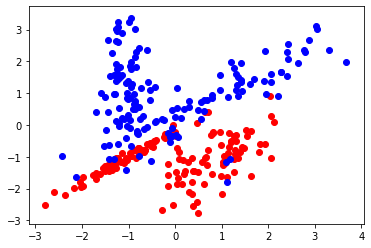

In [7]:
plt.scatter(X[y_index_0[0], 0], X[y_index_0[0], 1], color='red')
plt.scatter(X[y_index_1[0], 0], X[y_index_1[0], 1], color='blue')

In [10]:
knn1 = GridSearchCV(KNeighborsClassifier(),
                  {'n_neighbors': np.arange(4, 25)},
                    cv=10, scoring='accuracy').fit(X, y) 


knn1.best_score_

0.9266666666666667

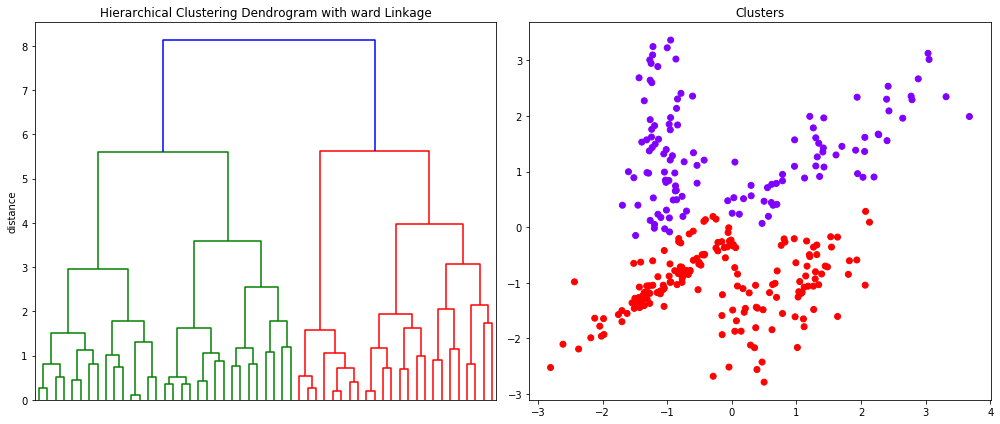

In [33]:
Z = linkage(X, 'complete')
plt.figure(figsize=(14, 6))
plt.subplot(121)
plt.title('Hierarchical Clustering Dendrogram with ward Linkage')
plt.ylabel('distance')
dendrogram(
    Z,
    p=5,
    truncate_mode='level',
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    no_labels=True)
clusters = fcluster(Z, 2, criterion='maxclust')
plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='rainbow')
plt.title('Clusters')
plt.tight_layout()
plt.show()





In [37]:
clusters_corrected = np.array([1 if clusters[i] - 1 == 0 else 0 for i in range(len(clusters))])
hcluster_accuracy_score = accuracy_score(clusters_corrected, y)
hcluster_accuracy_score

0.8833333333333333

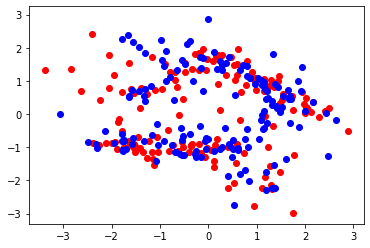

In [119]:
X1, y1 = make_classification(n_samples=1500, n_features=2, n_informative=2, n_redundant=0, hypercube=True)
y1_index_0 = np.where(y == 0)
y1_index_1 = np.where(y == 1)

plt.scatter(X1[y1_index_0[0], 0], X1[y1_index_0[0], 1], color='red')
plt.scatter(X1[y1_index_1[0], 0], X1[y1_index_1[0], 1], color='blue')

In [120]:
knn2 = GridSearchCV(KNeighborsClassifier(),
                  {'n_neighbors': np.arange(4, 25)},
                    cv=10, scoring='accuracy').fit(X1, y1) 


knn2.best_score_

0.9306666666666665

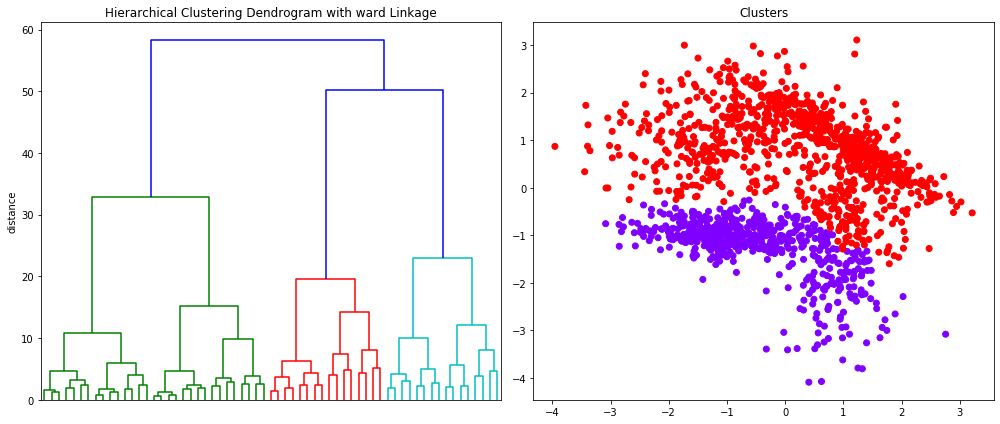

0.64


In [136]:
Z1 = linkage(X1, 'ward')
plt.figure(figsize=(14, 6))
plt.subplot(121)
plt.title('Hierarchical Clustering Dendrogram with ward Linkage')
plt.ylabel('distance')
dendrogram(
    Z1,
    p=5,
    truncate_mode='level',
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    no_labels=True)
clusters1 = fcluster(Z1, 2, criterion='maxclust')
plt.subplot(122)
plt.scatter(X1[:, 0], X1[:, 1], c=clusters1, cmap='rainbow')
plt.title('Clusters')
plt.tight_layout()
plt.show()


hcluster1_accuracy_score = accuracy_score(clusters1-1, y1)
print(hcluster1_accuracy_score)

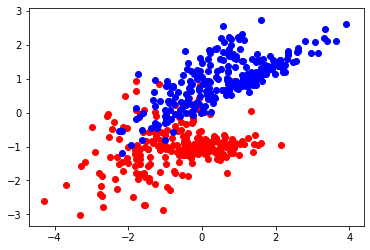

In [181]:
X_lr, y_lr = make_classification(n_samples=500, n_features=5, n_informative=2, n_redundant=3, hypercube=True)
y_lr_index_0 = np.where(y_lr == 0)
y_lr_index_1 = np.where(y_lr == 1)

plt.scatter(X_lr[y_lr_index_0[0], 0], X_lr[y_lr_index_0[0], 1], color='red')
plt.scatter(X_lr[y_lr_index_1[0], 0], X_lr[y_lr_index_1[0], 1], color='blue')

In [182]:
knn_lr = GridSearchCV(KNeighborsClassifier(),
                  {'n_neighbors': np.arange(4, 25)},
                    cv=10, scoring='accuracy').fit(X_lr, y_lr) 


knn_lr.best_score_

0.9339999999999999

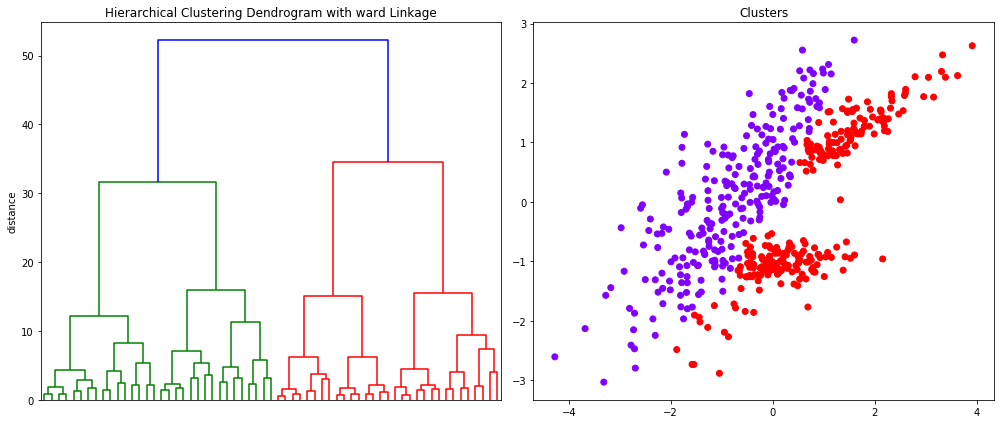

0.57


In [194]:
Z_lr = linkage(X_lr, 'ward')
plt.figure(figsize=(14, 6))
plt.subplot(121)
plt.title('Hierarchical Clustering Dendrogram with ward Linkage')
plt.ylabel('distance')
dendrogram(
    Z_lr,
    p=5,
    truncate_mode='level',
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    no_labels=True)
clusters_lr = fcluster(Z_lr, 2, criterion='maxclust')
plt.subplot(122)
plt.scatter(X_lr[:, 0], X_lr[:, 1], c=clusters_lr, cmap='rainbow')
plt.title('Clusters')
plt.tight_layout()
plt.show()

clusters_lr_corrected = np.array([1 if clusters_lr[i] - 1 == 0 else 0 for i in range(len(clusters_lr))])
hcluster_lr_accuracy_score = accuracy_score(clusters_lr_corrected, y_lr)
print(hcluster_lr_accuracy_score)

0.8959999999999999


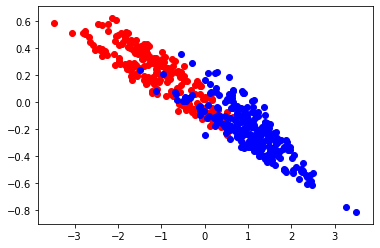

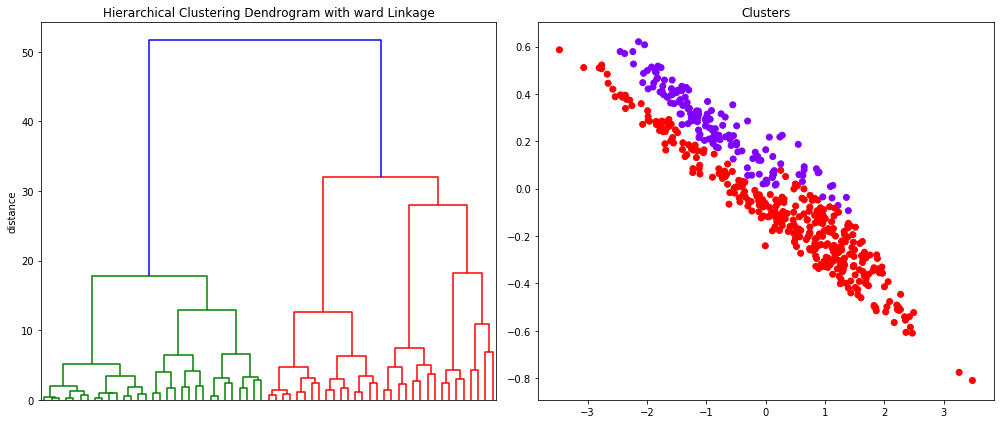

0.314
0.686


In [199]:
X_lr1, y_lr1 = make_classification(n_samples=500, n_features=5, n_informative=2, n_redundant=3, hypercube=True)
y_lr1_index_0 = np.where(y_lr1 == 0)
y_lr1_index_1 = np.where(y_lr1 == 1)

plt.scatter(X_lr1[y_lr1_index_0[0], 0], X_lr1[y_lr1_index_0[0], 1], color='red')
plt.scatter(X_lr1[y_lr1_index_1[0], 0], X_lr1[y_lr1_index_1[0], 1], color='blue')

knn_lr1 = GridSearchCV(KNeighborsClassifier(),
                  {'n_neighbors': np.arange(4, 25)},
                    cv=10, scoring='accuracy').fit(X_lr1, y_lr1) 


print(knn_lr1.best_score_)


Z_lr1 = linkage(X_lr1, 'ward')
plt.figure(figsize=(14, 6))
plt.subplot(121)
plt.title('Hierarchical Clustering Dendrogram with ward Linkage')
plt.ylabel('distance')
dendrogram(
    Z_lr1,
    p=5,
    truncate_mode='level',
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    no_labels=True)
clusters_lr1 = fcluster(Z_lr1, 2, criterion='maxclust')
plt.subplot(122)
plt.scatter(X_lr1[:, 0], X_lr1[:, 1], c=clusters_lr1, cmap='rainbow')
plt.title('Clusters')
plt.tight_layout()
plt.show()

clusters_lr1_corrected = np.array([1 if clusters_lr1[i] - 1 == 0 else 0 for i in range(len(clusters_lr1))])
hcluster_lr1_accuracy_score = accuracy_score(clusters_lr1_corrected, y_lr1)
print(hcluster_lr1_accuracy_score)

hcluster_lr1_accuracy_score = accuracy_score(clusters_lr1-1, y_lr1)
print(hcluster_lr1_accuracy_score)

0.9519999999999997


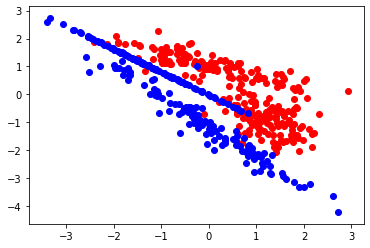

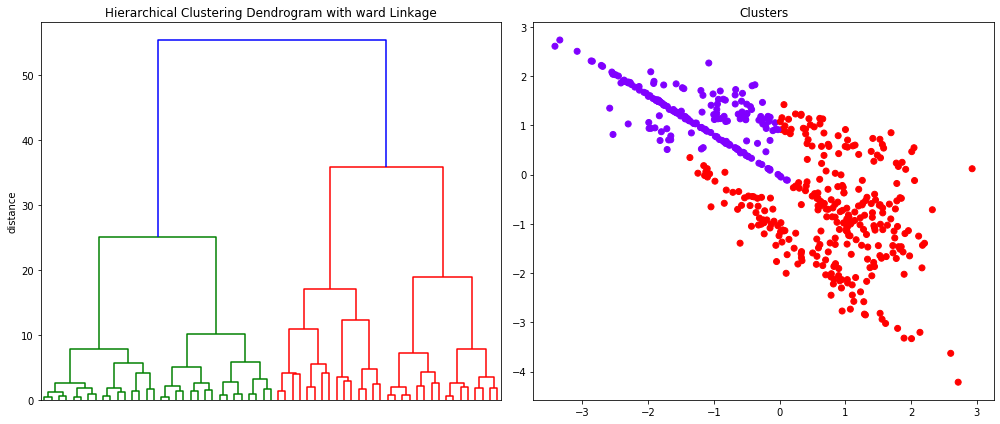

0.634
0.366


In [200]:
X_lr1, y_lr1 = make_classification(n_samples=500, n_features=5, n_informative=2, n_redundant=3, hypercube=True)
y_lr1_index_0 = np.where(y_lr1 == 0)
y_lr1_index_1 = np.where(y_lr1 == 1)

plt.scatter(X_lr1[y_lr1_index_0[0], 0], X_lr1[y_lr1_index_0[0], 1], color='red')
plt.scatter(X_lr1[y_lr1_index_1[0], 0], X_lr1[y_lr1_index_1[0], 1], color='blue')

knn_lr1 = GridSearchCV(KNeighborsClassifier(),
                  {'n_neighbors': np.arange(4, 25)},
                    cv=10, scoring='accuracy').fit(X_lr1, y_lr1) 


print(knn_lr1.best_score_)


Z_lr1 = linkage(X_lr1, 'ward')
plt.figure(figsize=(14, 6))
plt.subplot(121)
plt.title('Hierarchical Clustering Dendrogram with ward Linkage')
plt.ylabel('distance')
dendrogram(
    Z_lr1,
    p=5,
    truncate_mode='level',
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    no_labels=True)
clusters_lr1 = fcluster(Z_lr1, 2, criterion='maxclust')
plt.subplot(122)
plt.scatter(X_lr1[:, 0], X_lr1[:, 1], c=clusters_lr1, cmap='rainbow')
plt.title('Clusters')
plt.tight_layout()
plt.show()

clusters_lr1_corrected = np.array([1 if clusters_lr1[i] - 1 == 0 else 0 for i in range(len(clusters_lr1))])
hcluster_lr1_accuracy_score = accuracy_score(clusters_lr1_corrected, y_lr1)
print(hcluster_lr1_accuracy_score)

hcluster_lr1_accuracy_score = accuracy_score(clusters_lr1-1, y_lr1)
print(hcluster_lr1_accuracy_score)

0.9359999999999999


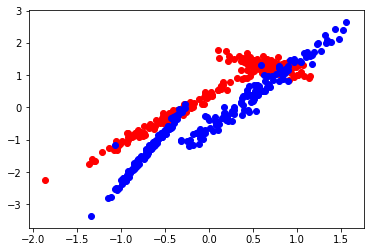

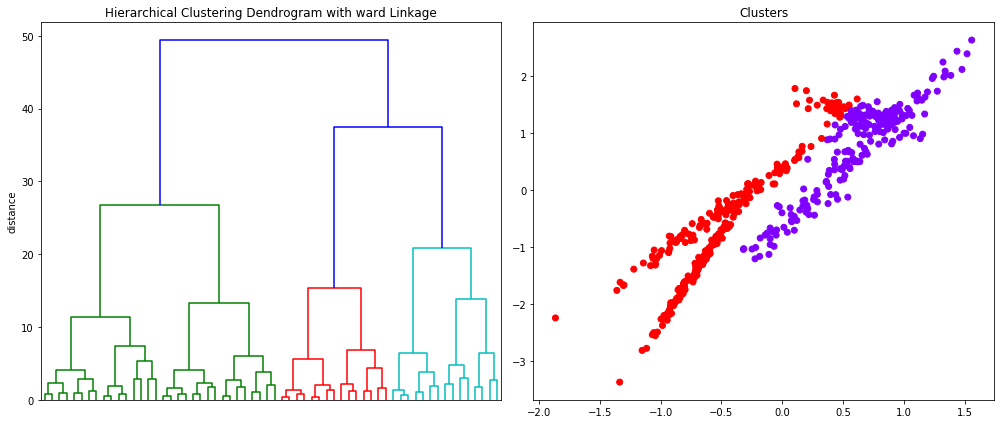

0.546
0.454


In [215]:
X_lr1, y_lr1 = make_classification(n_samples=500, n_features=5, n_informative=2, n_redundant=3, hypercube=True)
y_lr1_index_0 = np.where(y_lr1 == 0)
y_lr1_index_1 = np.where(y_lr1 == 1)

plt.scatter(X_lr1[y_lr1_index_0[0], 0], X_lr1[y_lr1_index_0[0], 1], color='red')
plt.scatter(X_lr1[y_lr1_index_1[0], 0], X_lr1[y_lr1_index_1[0], 1], color='blue')

knn_lr1 = GridSearchCV(KNeighborsClassifier(),
                  {'n_neighbors': np.arange(4, 25)},
                    cv=10, scoring='accuracy').fit(X_lr1, y_lr1) 


print(knn_lr1.best_score_)


Z_lr1 = linkage(X_lr1, 'ward')
plt.figure(figsize=(14, 6))
plt.subplot(121)
plt.title('Hierarchical Clustering Dendrogram with ward Linkage')
plt.ylabel('distance')
dendrogram(
    Z_lr1,
    p=5,
    truncate_mode='level',
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    no_labels=True)
clusters_lr1 = fcluster(Z_lr1, 2, criterion='maxclust')
plt.subplot(122)
plt.scatter(X_lr1[:, 0], X_lr1[:, 1], c=clusters_lr1, cmap='rainbow')
plt.title('Clusters')
plt.tight_layout()
plt.show()

clusters_lr1_corrected = np.array([1 if clusters_lr1[i] - 1 == 0 else 0 for i in range(len(clusters_lr1))])
hcluster_lr1_accuracy_score = accuracy_score(clusters_lr1_corrected, y_lr1)
print(hcluster_lr1_accuracy_score)

hcluster_lr1_accuracy_score = accuracy_score(clusters_lr1-1, y_lr1)
print(hcluster_lr1_accuracy_score)

0.9


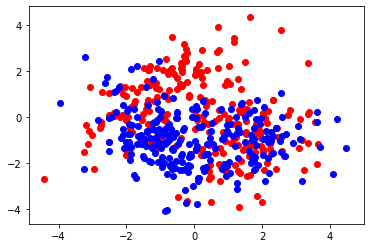

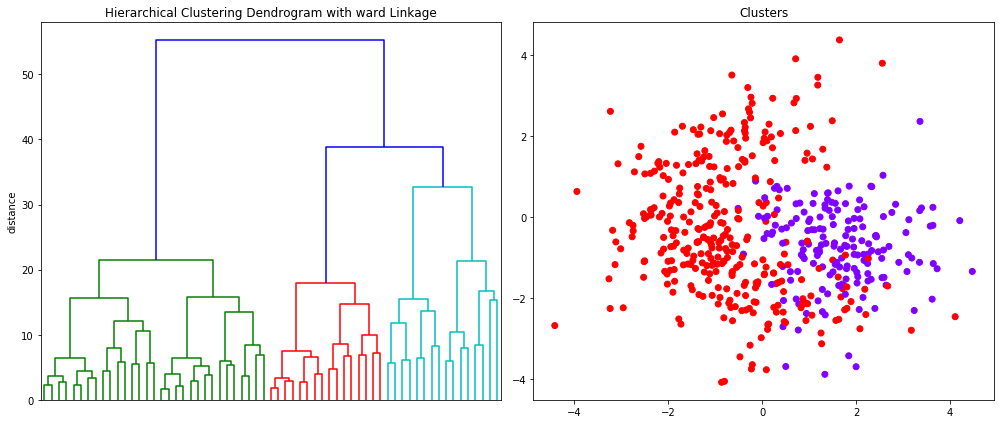

0.426
0.574


In [213]:


X_lr1, y_lr1 = make_classification(n_samples=500, n_features=5, n_informative=5, n_redundant=0, hypercube=True)
y_lr1_index_0 = np.where(y_lr1 == 0)
y_lr1_index_1 = np.where(y_lr1 == 1)

plt.scatter(X_lr1[y_lr1_index_0[0], 0], X_lr1[y_lr1_index_0[0], 1], color='red')
plt.scatter(X_lr1[y_lr1_index_1[0], 0], X_lr1[y_lr1_index_1[0], 1], color='blue')

knn_lr1 = GridSearchCV(KNeighborsClassifier(),
                  {'n_neighbors': np.arange(4, 25)},
                    cv=10, scoring='accuracy').fit(X_lr1, y_lr1) 


print(knn_lr1.best_score_)


Z_lr1 = linkage(X_lr1, 'ward')
plt.figure(figsize=(14, 6))
plt.subplot(121)
plt.title('Hierarchical Clustering Dendrogram with ward Linkage')
plt.ylabel('distance')
dendrogram(
    Z_lr1,
    p=5,
    truncate_mode='level',
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    no_labels=True)
clusters_lr1 = fcluster(Z_lr1, 2, criterion='maxclust')
plt.subplot(122)
plt.scatter(X_lr1[:, 0], X_lr1[:, 1], c=clusters_lr1, cmap='rainbow')
plt.title('Clusters')
plt.tight_layout()
plt.show()

clusters_lr1_corrected = np.array([1 if clusters_lr1[i] - 1 == 0 else 0 for i in range(len(clusters_lr1))])
hcluster_lr1_accuracy_score = accuracy_score(clusters_lr1_corrected, y_lr1)
print(hcluster_lr1_accuracy_score)

hcluster_lr1_accuracy_score = accuracy_score(clusters_lr1-1, y_lr1)
print(hcluster_lr1_accuracy_score)

In [124]:
X_blob, y_blob = make_blobs(n_samples=600, centers=2, cluster_std=1.6)

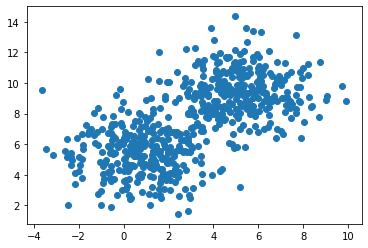

In [125]:
plt.scatter(X_blob[:, 0], X_blob[:, 1])

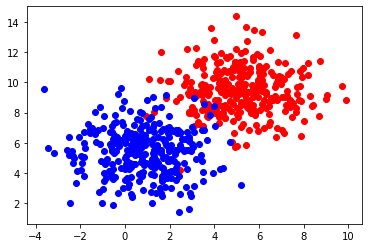

In [126]:
y_blob_index_0 = np.where(y_blob == 0)
y_blob_index_1 = np.where(y_blob == 1)

plt.scatter(X_blob[y_blob_index_0[0], 0], X_blob[y_blob_index_0[0], 1], color='red')
plt.scatter(X_blob[y_blob_index_1[0], 0], X_blob[y_blob_index_1[0], 1], color='blue')

In [150]:
kmeans = KMeans(n_clusters=2, max_iter=500)
kmeans_pred = kmeans.fit_predict(X_blob)

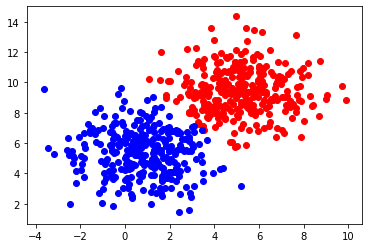

In [151]:
kmeans_blob_index_0 = np.where(kmeans_pred == 0)
kmeans_blob_index_1 = np.where(kmeans_pred == 1)

plt.scatter(X_blob[kmeans_blob_index_0[0], 0], X_blob[kmeans_blob_index_0[0], 1], color='red')
plt.scatter(X_blob[kmeans_blob_index_1[0], 0], X_blob[kmeans_blob_index_1[0], 1], color='blue')

In [142]:
lrcv = LogisticRegressionCV(Cs=50, max_iter=1000, cv=10)
lrcv.fit(X_blob , y_blob)

LogisticRegressionCV(Cs=50, class_weight=None, cv=10, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=1000, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [143]:
y_pred_lrcv = lrcv.predict(X_blob)
lrcv_accuracy_score = accuracy_score(y_blob, y_pred_lrcv)
lrcv_accuracy_score

0.9816666666666667

In [152]:
kmeans_accuracy_score = accuracy_score(y_blob, kmeans_pred)
kmeans_accuracy_score

0.98

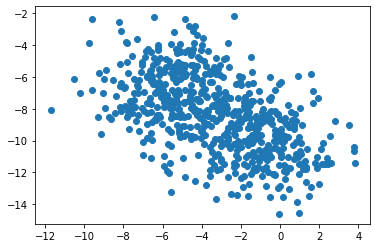

In [153]:
X_blob_1, y_blob_1 = make_blobs(n_samples=600, centers=2, cluster_std=1.8)
plt.scatter(X_blob_1[:, 0], X_blob_1[:, 1])

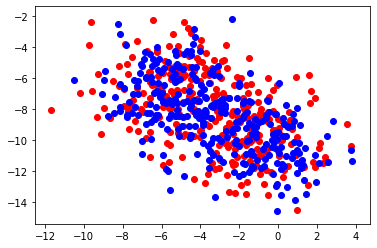

In [154]:
y_blob_1_index_0 = np.where(y_blob == 0)
y_blob_1_index_1 = np.where(y_blob == 1)

plt.scatter(X_blob_1[y_blob_1_index_0[0], 0], X_blob_1[y_blob_1_index_0[0], 1], color='red')
plt.scatter(X_blob_1[y_blob_1_index_1[0], 0], X_blob_1[y_blob_1_index_1[0], 1], color='blue')

In [163]:
knn = GridSearchCV(KNeighborsClassifier(),
                  {'n_neighbors': np.arange(4, 25)},
                  cv=10, scoring='accuracy').fit(X_blob_1, y_blob_1)

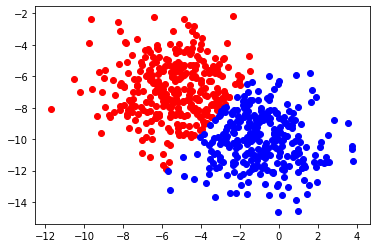

In [182]:
kmeans_1 = KMeans(n_clusters=2, max_iter=500)
kmeans_1_pred = kmeans_1.fit_predict(X_blob_1)

kmeans_blob_1_index_0 = np.where(kmeans_1_pred == 0)
kmeans_blob_1_index_1 = np.where(kmeans_1_pred == 1)

plt.scatter(X_blob_1[kmeans_blob_1_index_0[0], 0], X_blob_1[kmeans_blob_1_index_0[0], 1], color='red')
plt.scatter(X_blob_1[kmeans_blob_1_index_1[0], 0], X_blob_1[kmeans_blob_1_index_1[0], 1], color='blue')